Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
A = poly.fit_transform(X)
A

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

w = linalg.inv(A.T@A)@A.T@y
print(f"Tezine: {w}")

Tezine: [2.2        0.45714286]


In [5]:
# Vaš kôd ovdje
w_0 = linalg.pinv(A)@y
print(f"Tezine: {w_0}")

Tezine: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreska prema izrazu: 4.085714285714285
Srednja kvadratna pogreska: 2.0428571428571427


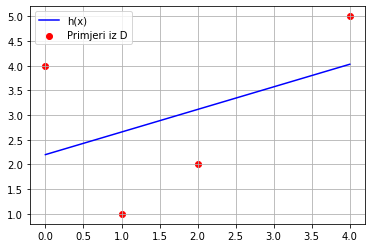

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

y_pred = A@w.T

E = 1/2*np.sum((y-y_pred)**2)
print(f"Pogreska prema izrazu: {E}")
print(f"Srednja kvadratna pogreska: {mean_squared_error(y,y_pred)}")

plt.grid()
plt.scatter(X,y,color="red")
plt.plot(X,y_pred,color="b")

plt.legend(['h(x)', "Primjeri iz D"])
plt.show()


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje
try: 
    w = np.linalg.inv(A)@y

except Exception as e:
    
    print(e)

Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
#Vaš kod ovdje 
reg = LinearRegression().fit(X,y)
print(f"w1: {reg.coef_[0]}\nw0: {reg.intercept_}\n")

y_predicted = reg.predict(X)
print(f"Predvidenje vrjednosti: {y_predicted}\n")

E = mean_squared_error(y_predicted,y)
print(f"Pogreska modela: {E}")

#vidimo da je pogreska ista kao i za prethodni racun


w1: 0.45714285714285713
w0: 2.2

Predvidenje vrjednosti: [2.2        2.65714286 3.11428571 4.02857143]

Pogreska modela: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
        
    s = np.random.normal(0, noise, X.shape[0])
    
    return np.add(np.reshape(f(X),(f(X).shape[0],)),s)


In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
# Vaš kôd ovdje
def f(x):
    
    return 5 + x -2*x**2 -5*x**3

X = make_instances (-5,5,50)
Y_ = make_labels(X,f,noise=200)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

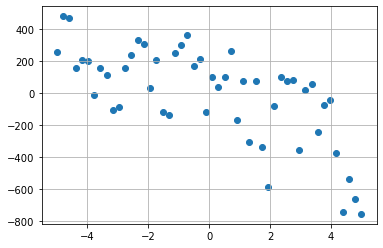

In [12]:
# Vaš kôd ovdje
plt.grid()
plt.scatter(X,Y_)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

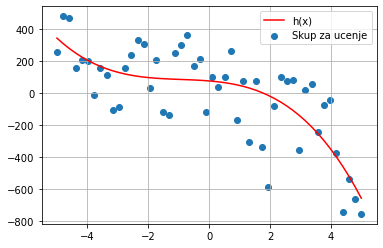

Pogreska modela: 904907.8090568344


In [13]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
A = poly.fit_transform(X) #matrica dizajna

w = linalg.pinv(A)@Y_ #pseudoinverz matrice dizajna pomnozen sa primjerima ( dobivanje tezina )
Y = A@w #predikcije

plt.grid()
plt.scatter(X,Y_)
plt.plot(X,Y,color='r')
plt.legend(["h(x)","Skup za ucenje"])

plt.show()

E = 1/2*np.sum((Y-Y_)**2)
print(f"Pogreska modela: {E}")


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Stupanj: 1, pogreska: 1150144.4016929509
Stupanj: 3, pogreska: 904907.8090568344
Stupanj: 5, pogreska: 778770.1759917805
Stupanj: 10, pogreska: 636512.6185801476
Stupanj: 20, pogreska: 408025.70222380507


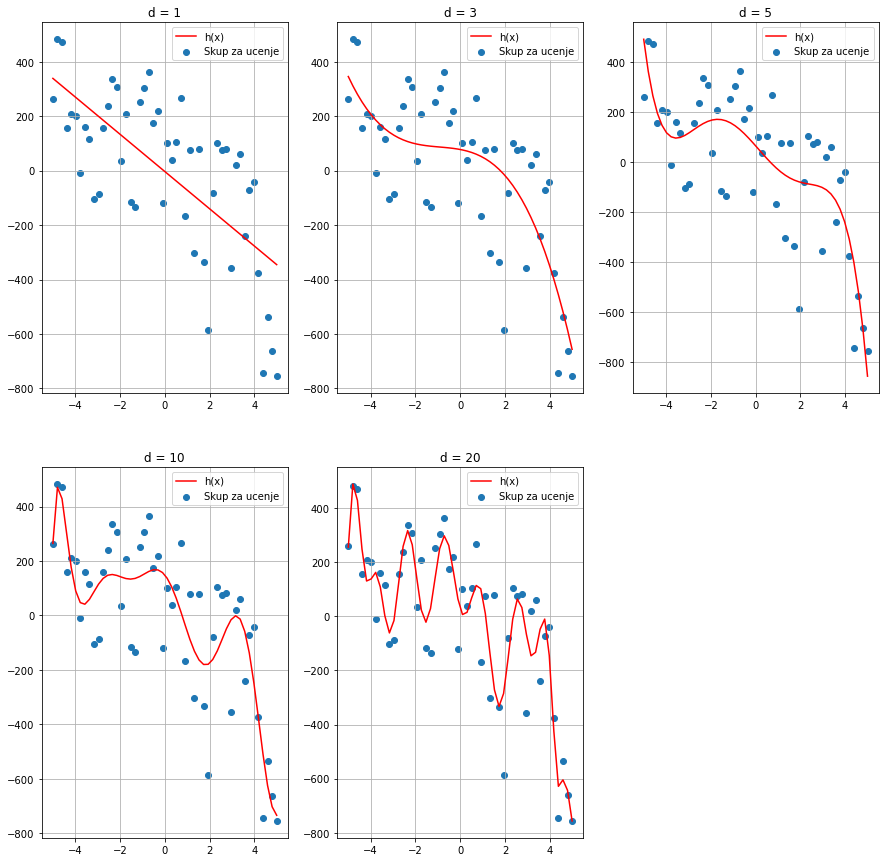

In [14]:
# Vaš kôd ovdje
d = np.array([1,3,5,10,20])

fig = plt.figure(figsize=(15, 15))

for i in range(len(d)):
    
    poly = PolynomialFeatures(d[i])
    A = poly.fit_transform(X)
    
    w = linalg.pinv(A)@Y_
    Y = A@w #predikcije
    
    E = 1/2*np.sum((Y_-Y)**2)
    
    ax = fig.add_subplot(2, 3, i+1)

    plt.grid()
    plt.scatter(X,Y_)
    plt.plot(X,Y,color='r')
    plt.legend(["h(x)","Skup za ucenje"])
    plt.title("d = %d" % d[i])
    
    print(f"Stupanj: {d[i]}, pogreska: {E}")
    
plt.show()
     

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

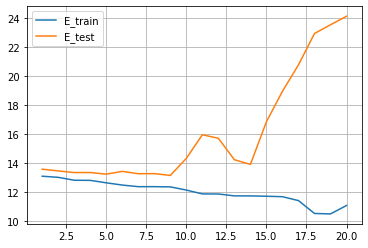

In [15]:
from sklearn.model_selection import train_test_split

d = np.linspace(1,20,20,dtype = int)

X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.5, random_state=42)

E_train = np.zeros(len(d))
E_test = np.zeros(len(d))

for i in range(len(d)):
    
    poly = PolynomialFeatures(d[i])
    A_train = poly.fit_transform(X_train)
    A_test = poly.fit_transform(X_test)
    
    w = linalg.pinv(A_train)@y_train
    y_train_pred = A_train@w #predikcije
    
    e_train = 1/2*np.sum((y_train-y_train_pred)**2)
    E_train[i]+=e_train
    
    y_test_pred = A_test@w
    
    e_test = 1/2*np.sum((y_test-y_test_pred)**2)
    E_test[i]+=e_test

#testiranje modela

plt.plot(d,[math.log(e) for e in E_train])
plt.plot(d,[math.log(e) for e in E_test])
plt.grid()
plt.legend(["E_train","E_test"])

plt.show()
# Vaš kôd ovdje

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

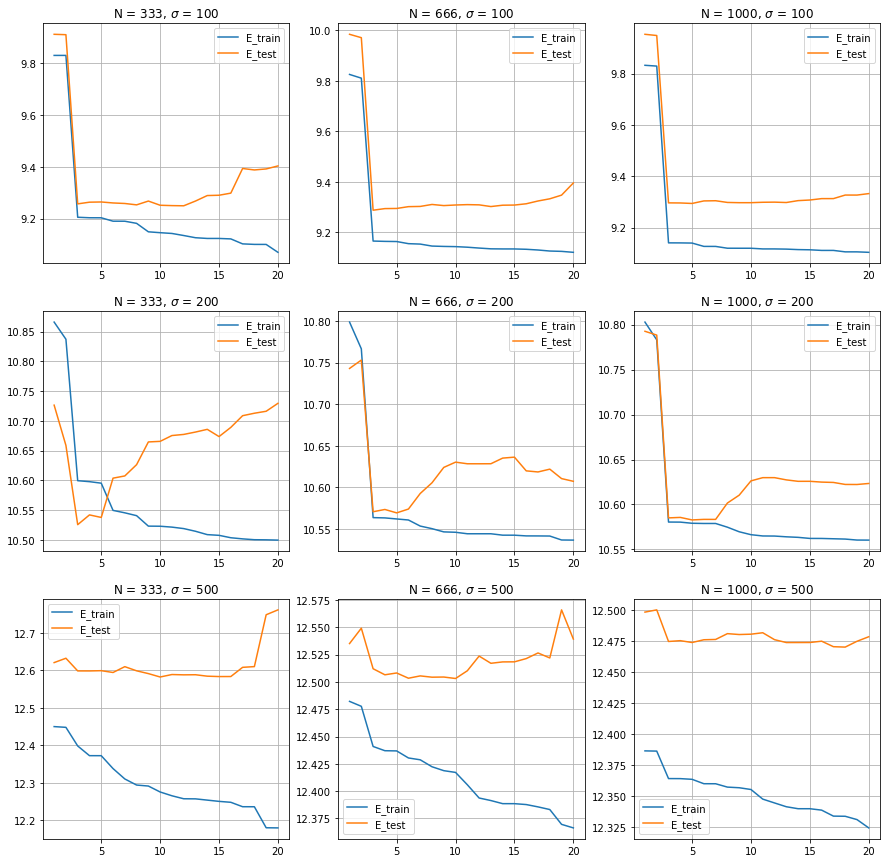

In [16]:
# Vaš kôd ovdje

d = np.linspace(1,20,20,dtype = int)


N = np.array([333,666,1000])
noises = np.array([100,200,500])

X = make_instances (-5,5,1000) #generiranje 1000 primjera
X_train,X_test = train_test_split(X, test_size=0.5, random_state=42) #podjela na dva skupa (ucenje i provjera)

X_trains = []
X_tests = []
y_trains = []
y_tests = []
E_trains = []
E_tests = []

for noise in noises:
    
    y_train = make_labels(X_train,f,noise)
    y_test = make_labels(X_test,f,noise)
    
    for sample_size in N:
        
        X_trains.append(X_train[0:int(sample_size/2)])
        X_tests.append(X_test[0:int(sample_size/2)])
        
        y_trains.append(y_train[0:int(sample_size/2)])
        y_tests.append(y_test[0:int(sample_size/2)])
        
for i in range(len(N)*len(noises)):
    
    X_test = X_tests[i]
    X_train = X_trains[i]
    y_test = y_tests[i]
    y_train = y_trains[i]
    
    E_train = np.zeros(len(d))
    E_test = np.zeros(len(d))
    
    for i in range(len(d)):

        poly = PolynomialFeatures(d[i])
        A_train = poly.fit_transform(X_train)
        A_test = poly.fit_transform(X_test)

        w = linalg.pinv(A_train)@y_train
        y_train_pred = A_train@w #predikcije

        e_train = mean_squared_error(y_train,y_train_pred)
        E_train[i]+=e_train

        y_test_pred = A_test@w

        e_test = mean_squared_error(y_test,y_test_pred)
        E_test[i]+=e_test
    
    E_tests.append(E_test)
    E_trains.append(E_train)
        
fig = plt.figure(figsize=(15, 15))

legend = [[333,100],[666,100],[1000,100],[333,200],[666,200],[1000,200],[333,500],[666,500],[1000,500]]

for i in range(len(N)*len(noises)):    
    ax = fig.add_subplot(3, 3, i+1)
    plt.plot(d, np.log(E_trains[i]), d, np.log(E_tests[i]))
    plt.legend(["E_train","E_test"])
    plt.title("N = %d, $\sigma$ = %d" % (legend[i][0],legend[i][1]))
    grid
    ax.grid()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
A = poly.fit_transform(X)

lambdas = np.array([0,1,10])

for l in lambdas:
    
    jedinicna = np.identity(4)
    jedinicna[0][0] = 0
    w = linalg.inv(A.T@A + np.multiply(jedinicna,l))@A.T@y
    print(f"Lambda: {l}, tezine: {w}")

Lambda: 0, tezine: [ 4.         -5.91666667  3.375      -0.45833333]
Lambda: 1, tezine: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda: 10, tezine: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

for l in lambdas:

    clf = Ridge(alpha=l)
    clf.fit(A,y)
    
    print(f"Lambda: {l}, tezine: {clf.intercept_,clf.coef_[1:]}")
    

Lambda: 0, tezine: (4.000000000000025, array([-5.91666667,  3.375     , -0.45833333]))
Lambda: 1, tezine: (3.0569614512471652, array([-0.69079365, -0.2831746 ,  0.1445805 ]))
Lambda: 10, tezine: (2.4944418431229733, array([-0.15897295, -0.13423067,  0.0815601 ]))


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

<Figure size 1080x1080 with 0 Axes>

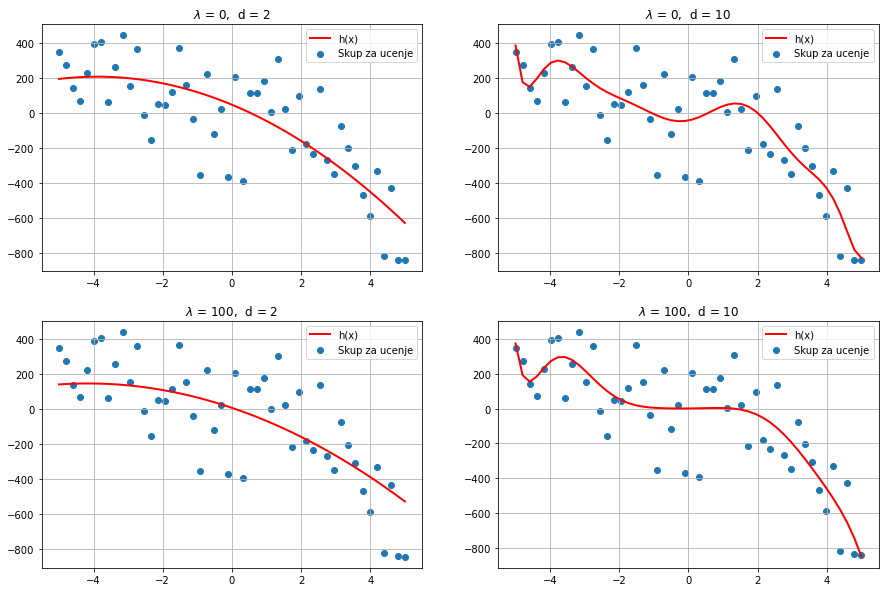

In [19]:
# Vaš kôd ovdje
X = make_instances (-5,5,50)
Y_ = make_labels(X,f,noise=200)

lambdas = np.array([0,100])
d = np.array([2,10])

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(wspace=0.2, hspace = 0.35) 

h_s = []

for l in lambdas:
    
    for grade in d:
        
        poly = PolynomialFeatures(grade)
        A = poly.fit_transform(X)
        
        w = linalg.inv(A.T@A + np.multiply(np.identity(grade+1),l))@A.T@Y_
        Y = A@w.T
        
        h_s.append(Y)

fig = plt.figure(figsize=(15, 10))

legend = [[0,2],[0,10],[100,2],[100,10]]

for i in range (len(h_s)):
    
    ax = fig.add_subplot(2, 2, i+1)
    plt.grid()
    plt.plot(X, h_s[i], 'r', linewidth = 2)
    plt.scatter(X,Y_)
    plt.legend(["h(x)","Skup za ucenje"])
    plt.title('$\lambda$ = %d,  d = %d' % (legend[i][0],legend[i][1]))
    
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


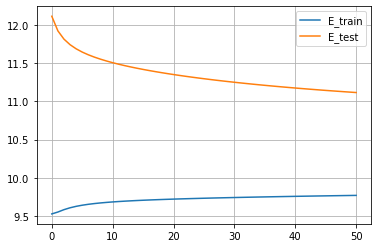

In [20]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.5, random_state=42)

d = 10

lambdas = np.linspace(0,50,51,dtype=int)

E_train = np.zeros(len(lambdas))
E_test = np.zeros(len(lambdas))

for l in lambdas:
    
    poly = PolynomialFeatures(d)
    
    A_train = poly.fit_transform(X_train)
    A_test = poly.fit_transform(X_test)
    
    w = linalg.inv(A_train.T@A_train + np.multiply(np.identity(d+1),l))@A_train.T@y_train
    y_test_pred = A_test@w.T
    y_train_pred = A_train@w.T
    
    e_train = mean_squared_error(y_train,y_train_pred)
    E_train[l]+=np.log(e_train)
    
    e_test = mean_squared_error(y_test,y_test_pred)
    E_test[l]+=np.log(e_test)
    
plt.plot(lambdas,E_train,lambdas,E_test)
plt.grid()
plt.legend(["E_train","E_test"])
    


## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [25]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [26]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [28]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [29]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [30]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.